In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf

Fake News

In [3]:
fake = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv")

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
fake["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

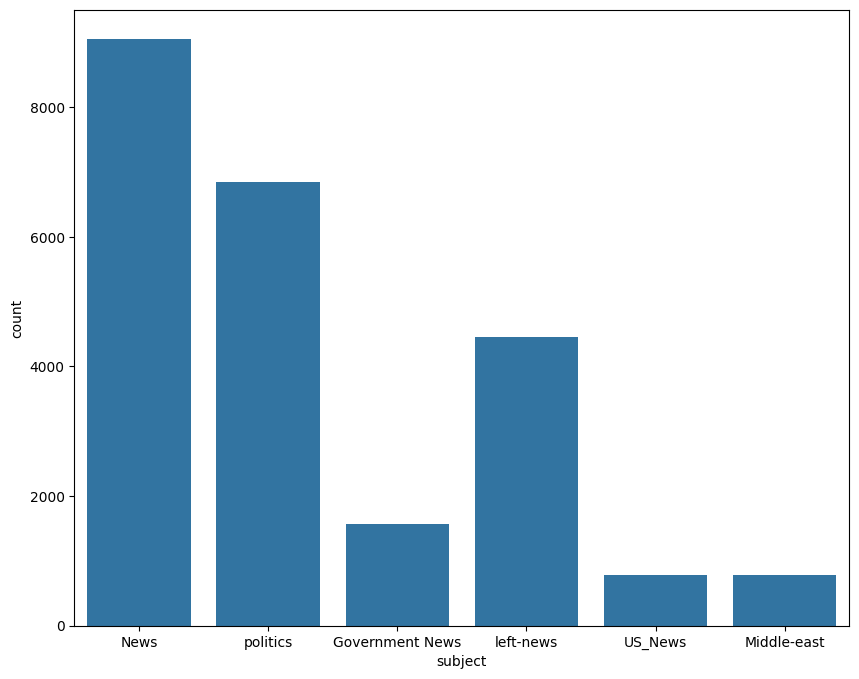

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(x = "subject", data=fake)

In [8]:
text = " ".join(fake["text"].tolist())

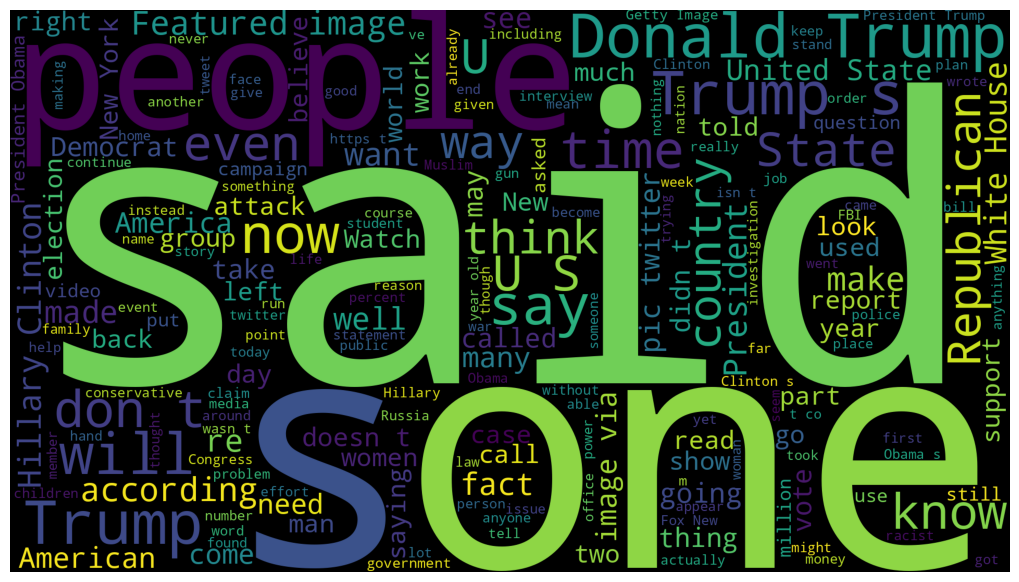

In [9]:
wordcloud = WordCloud(width = 1920, height =1080).generate(text)
fig = plt.figure(figsize = (10, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Real News

In [10]:
real = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv")

In [11]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [13]:
real["subject"].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

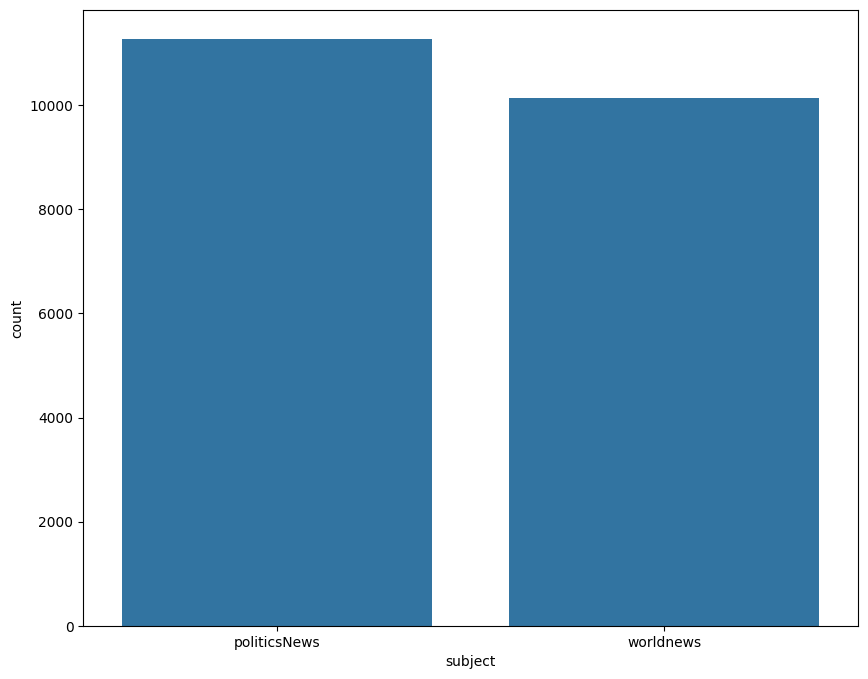

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x = "subject", data=real)

In [15]:
text = " ".join(real["text"].tolist())

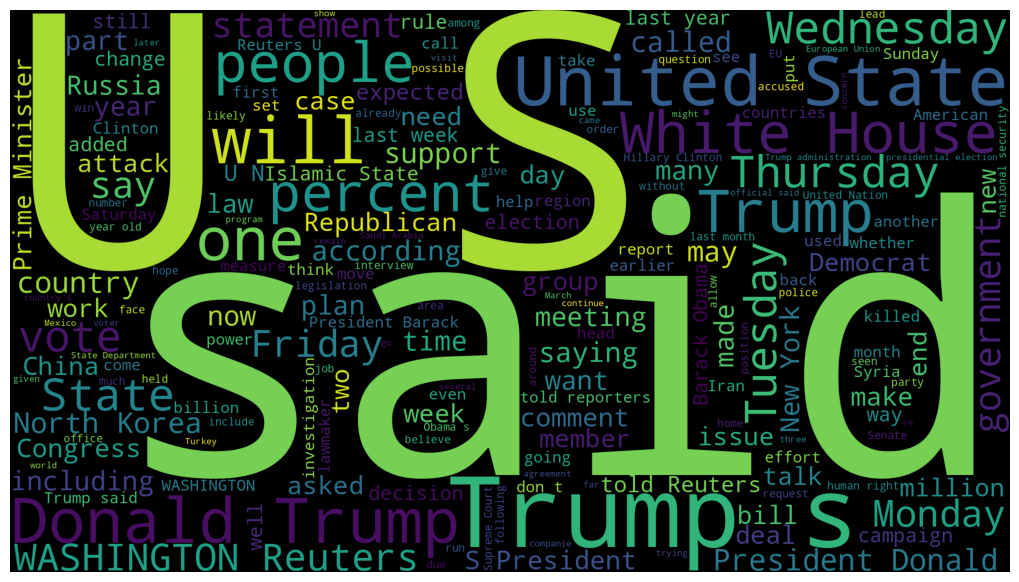

In [16]:
wordcloud = WordCloud(width = 1920, height =1080).generate(text)
fig = plt.figure(figsize = (10, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [17]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split("-", maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [18]:
unknown_publishers

[7,
 8,
 12,
 13,
 14,
 17,
 27,
 40,
 67,
 70,
 97,
 122,
 140,
 155,
 156,
 192,
 222,
 233,
 252,
 257,
 284,
 308,
 321,
 362,
 384,
 412,
 453,
 459,
 495,
 531,
 838,
 851,
 1076,
 1081,
 1112,
 1146,
 1179,
 1341,
 1381,
 1451,
 1509,
 1522,
 1523,
 1539,
 1570,
 1611,
 1645,
 1657,
 1659,
 1696,
 1711,
 1726,
 1730,
 1748,
 1768,
 1824,
 1826,
 1878,
 1885,
 1932,
 1952,
 1967,
 2012,
 2023,
 2056,
 2087,
 2100,
 2102,
 2120,
 2140,
 2171,
 2187,
 2247,
 2262,
 2275,
 2313,
 2315,
 2355,
 2383,
 2392,
 2442,
 2486,
 2510,
 2518,
 2557,
 2602,
 2658,
 2776,
 2811,
 2855,
 2885,
 2922,
 3107,
 3248,
 3270,
 3466,
 3488,
 3597,
 3615,
 3782,
 3835,
 3930,
 3944,
 3976,
 4170,
 4198,
 4206,
 4307,
 4358,
 4465,
 4554,
 4753,
 5246,
 5290,
 5316,
 5379,
 5380,
 5412,
 5504,
 5538,
 5588,
 5593,
 5633,
 5761,
 5784,
 5794,
 5796,
 5823,
 5866,
 5997,
 6026,
 6065,
 6075,
 6524,
 6573,
 6660,
 6823,
 7259,
 7353,
 7463,
 7568,
 7715,
 7766,
 7816,
 7890,
 7915,
 7922,
 8118,
 8127,
 8

In [19]:
len(unknown_publishers)

222

In [20]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [21]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append("Unknown")
  else:
    record = row.split("-", maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())


In [22]:
real["publisher"] = publisher
real["text"] = tmp_text

In [23]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [24]:
real.shape

(21417, 5)

In [25]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist())if str(text).strip()==""]


In [26]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [27]:
real["text"] = real["title"] + " " + real["text"]
fake["text"] = fake["title"] + " " + fake["text"]

In [28]:
#real["text"] = real["text"].apply(lambda x: str(x).lower())
#fake["text"] = fake["text"].apply(lambda x: str(x).lower())

In [29]:
real["class"] = 1
fake["class"] = 0

In [30]:
real = real[["text", "class"]]

In [31]:
fake = fake[["text", "class"]]

In [32]:
data = real.append(fake, ignore_index=True)

<ipython-input-32-45d5ced910ac>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = real.append(fake, ignore_index=True)


In [33]:
data.sample(5)

,text,class
22369,Trump Rages: My Tweets Attacking Mika Are ‘Mo...,0
14911,Brazilian minister quits in sign of rift in Te...,1
22297,These Charts Show Why We’re All Screwed Under...,0
18059,New U.S. helicopters mark major change for Afg...,1
21905,Phoenix Newspaper Breaks The Internet In Brut...,0


In [34]:
#https://github.com/laxmimerit/preprocess_kgptalkie

!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

In [35]:
#import preprocess_kgptalkie as ps

In [36]:
#data["text"] = data["text"].apply(lambda x: ps.remove_special_chars(x))

In [37]:
#import gensim

In [38]:
y = data["class"].values

In [39]:
X =  data["text"].tolist()

In [40]:
print(X[0])

As U.S. budget fight looms, Republicans flip their fiscal script The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary”

In [41]:
#DIM = 100
#w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [42]:
#len(w2v_model.wv.vocab)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [44]:
NUM_WORDS = 10000

In [45]:
tokenizer = Tokenizer(oov_token="<oov>", num_words= NUM_WORDS )
tokenizer.fit_on_texts(X_train)

In [46]:
len(tokenizer.index_word)

130917

In [47]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

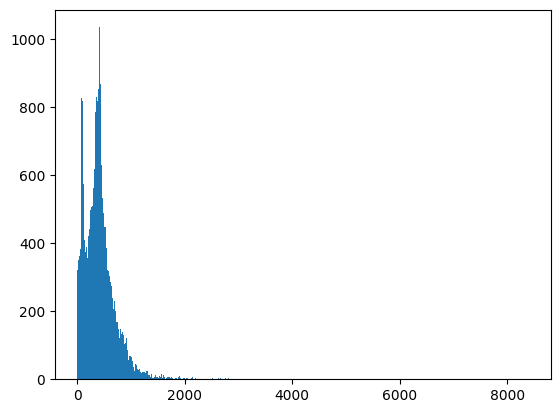

In [48]:
 plt.hist([len(x) for x in X_train], bins = 700)
 plt.show()

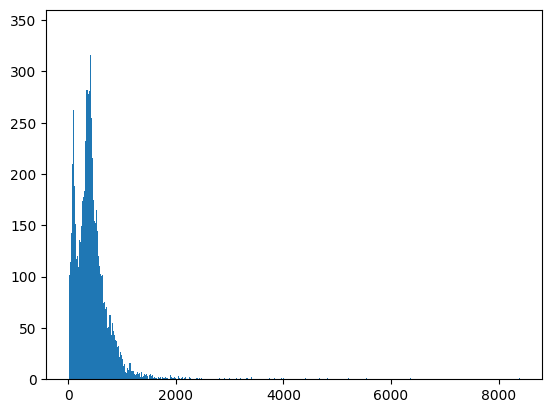

In [49]:
 plt.hist([len(x) for x in X_test], bins = 700)
 plt.show()

In [50]:
nos = np.array([len(x) for x in X_train])
len(nos[nos>1000])

1331

In [51]:
nos = np.array([len(x) for x in X_test])
len(nos[nos>1000])

420

In [52]:
maxlen=500
X_train = pad_sequences(X_train, maxlen=maxlen)

In [53]:
X_test = pad_sequences(X_test, maxlen=maxlen)

In [54]:
X_test.shape

(11225, 500)

In [55]:
X_train.shape

(33673, 500)

In [56]:
DIM = 100

In [57]:
model = Sequential()
model.add(Embedding(NUM_WORDS, output_dim = DIM, input_length=maxlen))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 128)))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["acc"])


In [58]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 500, 100)          0         
                                                                 
 bidirectional (Bidirection  (None, 256)               234496    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1234753 (4.71 MB)
Trainable params: 1234753 (4.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=6)

Epoch 1/6
1053/1053 [==============================] - 128s 116ms/step - loss: 0.1199 - acc: 0.9589 - val_loss: 0.0759 - val_acc: 0.9744
Epoch 2/6
1053/1053 [==============================] - 59s 56ms/step - loss: 0.0561 - acc: 0.9804 - val_loss: 0.0447 - val_acc: 0.9867
Epoch 3/6
1053/1053 [==============================] - 49s 47ms/step - loss: 0.0392 - acc: 0.9875 - val_loss: 0.0495 - val_acc: 0.9860
Epoch 4/6
1053/1053 [==============================] - 47s 45ms/step - loss: 0.0246 - acc: 0.9931 - val_loss: 0.0699 - val_acc: 0.9810
Epoch 5/6
1053/1053 [==============================] - 44s 41ms/step - loss: 0.0184 - acc: 0.9942 - val_loss: 0.0373 - val_acc: 0.9906
Epoch 6/6
1053/1053 [==============================] - 46s 44ms/step - loss: 0.0079 - acc: 0.9980 - val_loss: 0.0354 - val_acc: 0.9923


In [140]:
#Example = "Hicks added: “This made us all unemployable. Like untouchable. God I’m so f***ing mad"
#Example = "In one day he ended every future opportunity that doesn’t include speaking engagements at the local Proud Boys chapter,” Hicks wrote to Radford on January 6, 2021. “And all of us that didn’t have jobs lined up will be perpetually unemployed. I’m so mad and upset. We all look like domestic terrorists now."
#Example = "Erdogan quoted during the last day's interview that he has been considering of being a Muslim in his future life."
Example = "Donald J. Trump quoted during the last day's interview that he has been considering of being a Muslim in his future life."
#Example = "Messi is better than Ronaldo"
#Example= "Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban."
#Example = "Taliban allowed women to attend classes in universities. The only obstacle to the situation is that the age of all the women has been set to zero, which means no women is legally allowed to university."

In [141]:
NewsExample = tokenizer.texts_to_sequences([Example])
NewsExample = pad_sequences (NewsExample, maxlen=maxlen)


In [142]:
#tokenizer.word_index.get("taliban")

Fake --> False <br>
Real --> True

In [143]:
model.predict(NewsExample, verbose=0)

array([[0.00197173]], dtype=float32)

In [144]:
(model.predict(NewsExample, verbose=0) > 0.5)[0][0]

False

In [145]:
#model.save("model")

In [146]:
#!zip model.zip model/

In [147]:
#model2 = tf.keras.models.load_model("model")

In [148]:
#(model2.predict(NewsExample, verbose=0) > 0.5)[0][0]

In [149]:
#!unzip model.zip